In [16]:
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline
rcParams['font.family']='serif'
rcParams['font.size']= 16

In [17]:
#constants
gamma = 1.4
rho_L = 1    #[kg/m^3]
v_L = 0    #[m/s]
p_L = 100000    #[N/m^2]
rho_R = 0.125    #[kg/m^2]
v_R = 0     #[m/s]
p_R = 10000    #[N/m^2]
et_L = 0.5*v_L**2 + p_L/((gamma-1)*rho_L)
et_R = 0.5*v_R**2 + p_R/((gamma-1)*rho_R)

In [18]:
def initu(nx):
    u = numpy.zeros((3,nx))
    u[0,:(nx/2)] = rho_L
    u[1,:(nx/2)] = rho_L*v_L
    u[2,:(nx/2)] = rho_L*et_L
    u[0,(nx/2):] = rho_R
    u[1,(nx/2):] = rho_R*v_L
    u[2,(nx/2):] = rho_R*et_R
    return u   

In [19]:
def computeF(u):
    u1 = u[0,:]
    u2 = u[1,:]
    u3 = u[2,:]
    return numpy.array([u2, u2**2/u1 +(gamma-1)*(u3-(1/2*u2**2/u1)), (u3+(gamma-1)*(u3 - (1/2*u2**2/u1)))*u2/u1])

In [20]:
def richtmeyer(u, nt, dt, dx):
    u_n = numpy.zeros((nt,len(u),nx))
    u_star = numpy.zeros_like(u)
    u_n[0,:,:] = u.copy()
    u_star[:,:] = u.copy()
    
    for t in range(1,nt):
        F = computeF(u)
        u_star[:,:-1] = 0.5*(u[:,1:]+u[:,:-1])- dt/(2*dx)*(F[:,1:]-F[:,:-1])
        F_star = computeF(u_star)
        u_n[t,:,1:-1] = u[:,1:-1] - dt/dx*(F_star[:,1:-1]-F_star[:,:-2])
        
        u = u_n[t,:,:].copy()
    return u_n

In [21]:
t = 0.01
nx = 81
dx = 0.25
dt = 0.0002
x = numpy.linspace(-10,10,nx)
sigma = 1
nt = int(t/dt)+1
u = initu(nx)

In [22]:
u_n=richtmeyer(u,nt,dt,dx)
print(u_n)

[[[  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.25000000e-01
     1.25000000e-01   1.25000000e-01]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  2.50000000e+05   2.50000000e+05   2.50000000e+05 ...,   2.50000000e+04
     2.50000000e+04   2.50000000e+04]]

 [[  0.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.25000000e-01
     1.25000000e-01   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   2.50000000e+05   2.50000000e+05 ...,   2.50000000e+04
     2.50000000e+04   0.00000000e+00]]

 [[  0.00000000e+00              nan   1.00000000e+00 ...,   1.25000000e-01
                nan   0.00000000e+00]
  [  0.00000000e+00              nan   0.00000000e+00 ...,   0.00000000e+00
                nan   0.00000000e+00]
  [  0.00000000e+00              nan   2.50000000e+05 ...,   2.50000000e+04
        

/home/gil/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


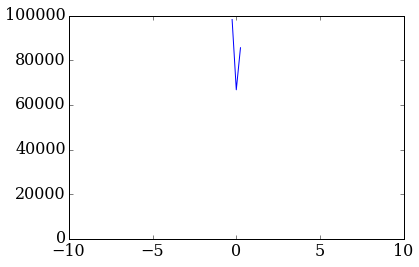

In [41]:
pyplot.plot(x,u_n[39,2,:])